In [1]:
from dtwhaclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering, plot_signals, shuffle_signals, plot_cluster
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
%matplotlib inline 

import matplotlib
fontsize = 26
font = {'family': 'Times',
        'weight': 'bold',
        'size': fontsize}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')

### Create 5 signals

In [2]:
np.random.seed(0)
# sampling parameters
fs = 100   # sampling rate, in Hz
T  = 1      # duration, in seconds
N  = T * fs # duration, in samples
M  = 5      # number of sources
R  = 3      # number of copies
MR = M * R 


# time variable
t = np.linspace(0, T, N)

S1 = np.sin(2 * np.pi * t * 7)
S2 = signal.sawtooth(2 * np.pi * t * 5)
S3 = np.abs(np.cos(2 * np.pi * t * 3)) - 0.5
S4 = np.sign(np.sin(2 * np.pi * t * 8))
S5 = np.random.randn(N)

time_series = np.array([S1, S2, S3, S4, S5])
time_series.shape

(5, 100)

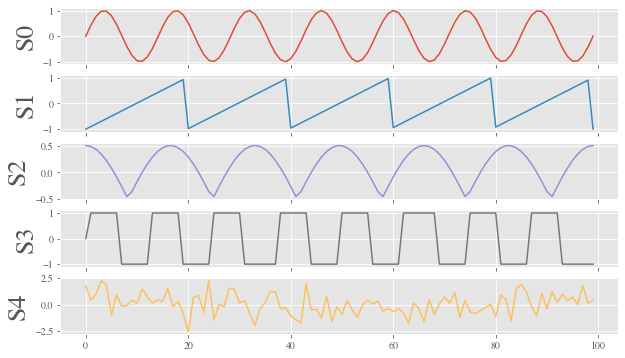

In [3]:
fig, ax, labels0 = plot_signals(time_series)
plt.show()

### Add noise and make 3 copies of each signal

In [4]:
SNR = 0.2
X0 = np.tile(S1, (R, 1)) + np.random.randn(R, N) * SNR 
X1 = np.tile(S2, (R, 1)) + np.random.randn(R, N) * SNR 
X2 = np.tile(S3, (R, 1)) + np.random.randn(R, N) * SNR 
X3 = np.tile(S4, (R, 1)) + np.random.randn(R, N) * SNR 
X4 = np.tile(S5, (R, 1)) + np.random.randn(R, N) * SNR 
X = np.concatenate((X0, X1, X2, X3, X4))

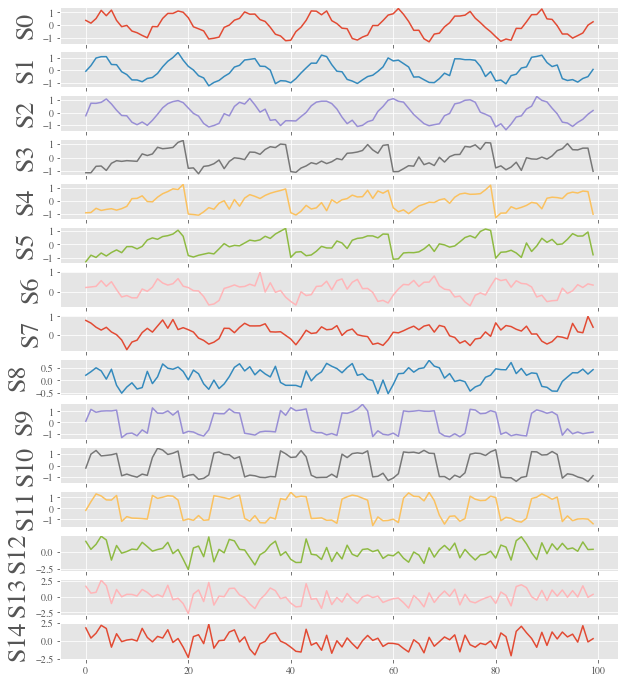

In [5]:
## instantiate the class
# dtw_cluster2 = dtw_clustering(X)
# dtw_cluster2.plot_signals(figsize=(10,12))
# plt.show()
fig, ax, labels_orig = plot_signals(X,figsize=(10,12))
plt.show()

Now, we have 15 signals in total. Let us also randomly make these signals distributed in geographical space by assigning them longitudes and latitudes. We assume that the signals with similar waveforms are geographically co-located. 

```
S0 variants (S0, S1, S2) -> xrange(0-3) yrange(7-10)
S1 variants (S3, S4, S5) -> xrange(1-4) yrange(3-5)
S2 variants (S6, S7, S8) -> xrange(4-8) yrange(4-6)
S3 variants (S9, S10, S11) -> xrange(5-10) yrange(0-4)
S4 variants (S12, S13, S14) -> xrange(5-9) yrange(6-9)
```

In [6]:
S0_lons = np.random.uniform(0, 3, 3)
S0_lats = np.random.uniform(7, 10, 3)

S1_lons = np.random.uniform(1, 4, 3)
S1_lats = np.random.uniform(3, 5, 3)

S2_lons = np.random.uniform(4, 8, 3)
S2_lats = np.random.uniform(4, 6, 3)

S3_lons = np.random.uniform(5, 10, 3)
S3_lats = np.random.uniform(0, 4, 3)

S3_lons = np.random.uniform(5, 10, 3)
S3_lats = np.random.uniform(0, 4, 3)

S4_lons = np.random.uniform(5, 9, 3)
S4_lats = np.random.uniform(6, 9, 3)

In [7]:
lons = np.concatenate((S0_lons, S1_lons, S2_lons, S3_lons, S4_lons))
lats = np.concatenate((S0_lats, S1_lats, S2_lats, S3_lats, S4_lats))

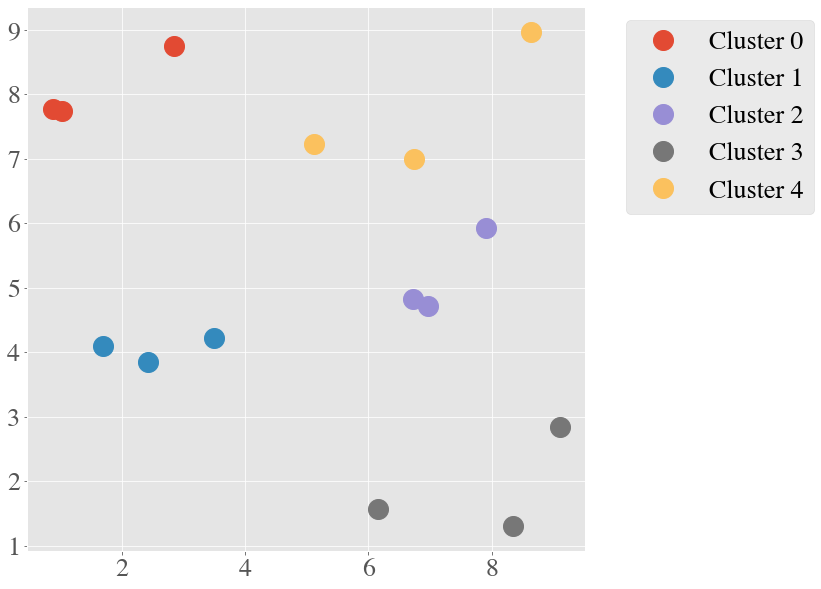

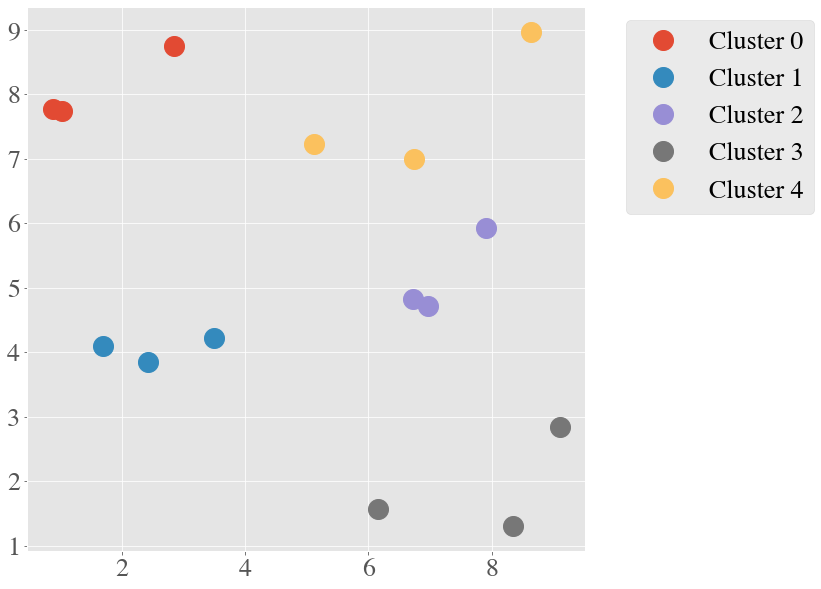

In [8]:
plot_cluster(lons,lats)
plt.show()

### Reshuffle the noisy signals

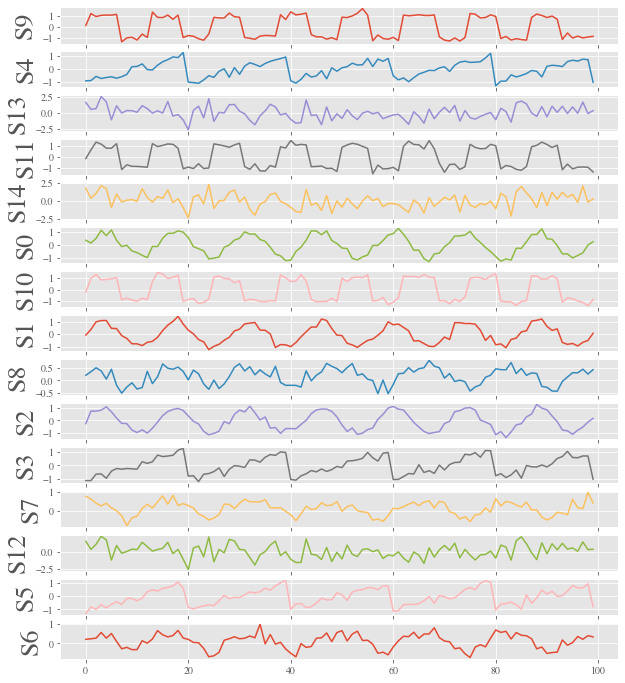

In [9]:
# Y,fig, ax = dtw_cluster2.reshuffle_signals(plot_signals=True)
# plt.show()

shuffled_idx, shuffled_matrix, fig, ax = shuffle_signals(X, labels=[], plot_signals=True, figsize=(10, 12))
plt.show()

### Reshuffled signal names

In [10]:
shuffled_idx

array([ 9,  4, 13, 11, 14,  0, 10,  1,  8,  2,  3,  7, 12,  5,  6])

In [11]:
labels_orig[shuffled_idx]

array(['S9', 'S4', 'S13', 'S11', 'S14', 'S0', 'S10', 'S1', 'S8', 'S2',
       'S3', 'S7', 'S12', 'S5', 'S6'], dtype='<U3')

In [12]:
shuffled_matrix

array([[ 0.11119254,  1.17849478,  0.91553704, ..., -1.01309768,
        -0.93036615, -0.86734838],
       [-0.92345351, -0.90583836, -0.57871043, ...,  0.7546335 ,
         0.7129586 , -1.03571782],
       [ 1.6701902 ,  0.57529634,  0.70570541, ...,  1.73651178,
        -0.08895654,  0.37914425],
       ...,
       [ 1.47476813,  0.30968715,  1.04262435, ...,  1.38975738,
         0.28066622,  0.31772385],
       [-1.31008587, -0.81552613, -0.9868535 , ...,  0.63905253,
         0.93858336, -0.78361296],
       [ 0.21101196,  0.2398201 ,  0.27063408, ...,  0.21294812,
         0.39699604,  0.33400708]])

In [13]:
# instantiate the class
dtw_cluster2 = dtw_clustering(shuffled_matrix, labels=labels_orig[shuffled_idx])

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



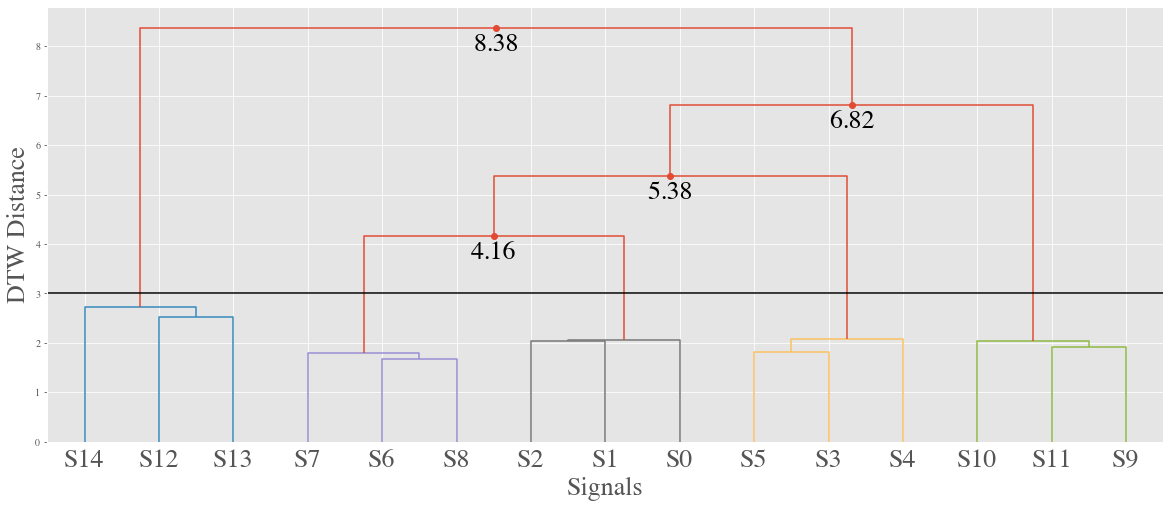

In [14]:
## instantiate the class
dtw_cluster2.plot_dendrogram(annotate_above=3, max_d = 3,xlabel="Signals")
plt.show()

In the above dendrogram, we manually selected the threshold distance to be 3 to find the best clusters

### plot only truncated dendrogram, which only shows the last truncate_p=5 out of our all merges

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



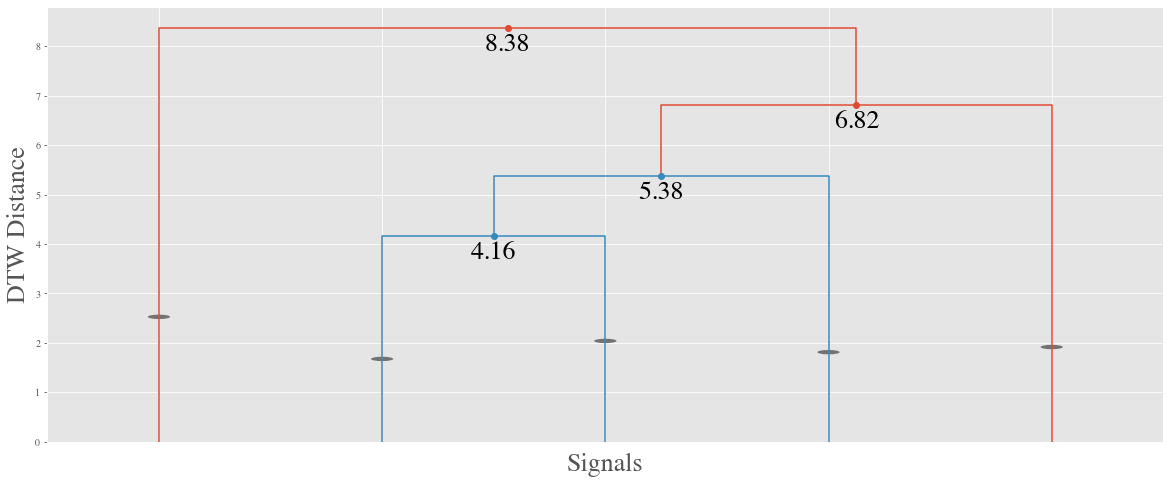

In [15]:
## instantiate the class
dtw_cluster2.plot_dendrogram(truncate_p=5,annotate_above=3,xlabel="Signals") 
plt.show()

### How the DTW distance changes with iterations to obtain the dendrogram

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



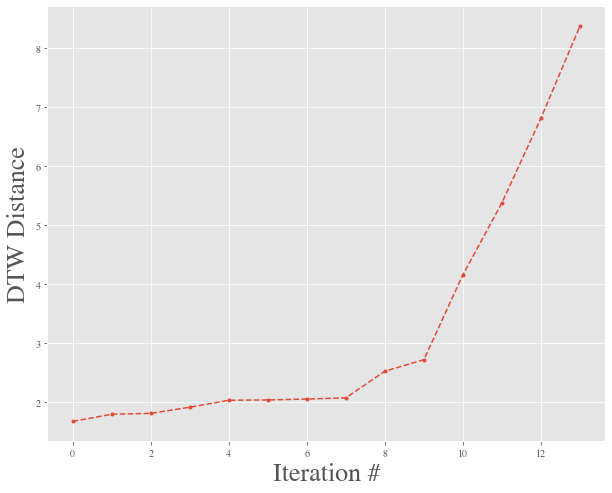

In [16]:
dtw_cluster2.plot_hac_iteration()
plt.show()

In [17]:
maxincons, inconsistencyMatrix, cluster = dtw_cluster2.compute_cut_off_inconsistency(depth=3, t=0.7, return_cluster=True)

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.



In [18]:
np.median(maxincons)

0.7071067811865694

In [19]:
cluster

array([ 9,  8,  1,  9,  2,  6, 10,  5,  3,  5,  7,  4,  1,  7,  3],
      dtype=int32)